<a href="https://colab.research.google.com/github/Sudhirkumar136/g-assistance-guide/blob/main/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [74]:
df = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=['Date'])

In [75]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [76]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-13,144.589996,148.100006,143.110001,147.110001,147.110001,113787000
2022-05-16,145.550003,147.520004,144.179993,145.539993,145.539993,86643800
2022-05-17,148.860001,149.770004,146.679993,149.240005,149.240005,78336300
2022-05-18,146.850006,147.360001,139.899994,140.820007,140.820007,109742900
2022-05-19,139.880005,141.660004,136.600006,137.350006,137.350006,136095600


In [77]:
train_time=int(len(df)*0.7)
test_time=len(df)-train_time

print(train_time)
print(test_time)

7313
3135


In [78]:
x_train=df[:train_time]
x_test=df[train_time:]

In [79]:
x_test.shape

(3135, 6)

In [80]:
print("Shape of train data - {}".format(x_train.shape))
print("Type of train data - {}".format(type(x_train)))

Shape of train data - (7313, 6)
Type of train data - <class 'pandas.core.frame.DataFrame'>


In [81]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x_train)

In [82]:
x=[]
y=[]
for i in range(7,x_scaled.shape[0]):
  x.append(x_scaled[i-7:i])
  y.append(x_scaled[i,0])

In [83]:
x_window_set,y_window_set=np.array(x),np.array(y)

In [84]:
x_window_set.shape

(7306, 7, 6)

In [85]:
y_window_set.shape

(7306,)

Define the model

In [86]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=6, kernel_size=30,strides=1, padding="same",activation="relu",input_shape=[x_window_set.shape[1], 6]),    #First convolutional layer
  tf.keras.layers.Activation('relu'),                                                               #First activation layer
  tf.keras.layers.AveragePooling1D(pool_size=2, strides=None, padding="valid"),                     #First pooling layer
  tf.keras.layers.Conv1D(filters=4, kernel_size=15,strides=1, padding="same", activation="relu"),   #second convolutional layer
  tf.keras.layers.Activation('relu'),                                                               #second activation layer
  tf.keras.layers.AveragePooling1D(pool_size=2, strides=None, padding="valid"),                     #second pooling layer
  tf.keras.layers.Conv1D(filters=2, kernel_size=7, strides=1, padding="same", activation="relu"),   #third convolutional layer
  tf.keras.layers.Activation('relu'),                                                               #third activation layer
  tf.keras.layers.AveragePooling1D(pool_size=1, strides=None, padding="valid"),                     #third pooling layer
  tf.keras.layers.Flatten(),    #First flatten layer.It is used to flatten the matrix of data.
  tf.keras.layers.Dense(32),    #First dense layer.
  tf.keras.layers.Dense(1)      #Output layer
])

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 7, 6)              1086      
                                                                 
 activation_9 (Activation)   (None, 7, 6)              0         
                                                                 
 average_pooling1d_9 (Averag  (None, 3, 6)             0         
 ePooling1D)                                                     
                                                                 
 conv1d_10 (Conv1D)          (None, 3, 4)              364       
                                                                 
 activation_10 (Activation)  (None, 3, 4)              0         
                                                                 
 average_pooling1d_10 (Avera  (None, 1, 4)             0         
 gePooling1D)                                         

In [88]:
model.compile(loss='mse',#loss used is mean squared error.
              optimizer='adam',#Optimizer used is Adam,since it smooths the oscillation of gradient and can self-tune the learning rate
              metrics=["mae"])#metric is mean absolute error.

In [90]:
model.fit(x_window_set,y_window_set, epochs=100,batch_size=1024)

Epoch 1/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0647 - mae: 0.1073
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0434 - mae: 0.0903
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0346 - mae: 0.0822
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0325 - mae: 0.0797
Epoch 5/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0305 - mae: 0.0776
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0294 - mae: 0.0765
Epoch 7/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0289 - mae: 0.0756
Epoch 8/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0287 - mae: 0.0752
Epoch 9/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0285 - mae: 0.0748
Epoch 10/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0287 - mae: 0.0754
Epoch 11/100
8/8 [==============================] - 0s 29ms/step - lo

In [92]:
x_real_test=df[train_time-7:] 
x_a_real_test=np.array(x_real_test)

In [94]:
x_t_scaled=scaler.transform(x_a_real_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
x_t=[]
y_t=[]

In [96]:
for i in range(7,x_t_scaled.shape[0]):
  x_t.append(x_t_scaled[i-7:i])
  y_t.append(x_t_scaled[i,0])

In [97]:
x_test_window_set,y_test_window_set=np.array(x_t),np.array(y_t)

In [98]:
predicted_value=model.predict(x_test_window_set)

Mean Absolute percentage error



In [99]:
m = tf.keras.metrics.MeanAbsolutePercentageError()#initialize the MAPE class.
m.update_state(y_test_window_set,predicted_value)#calculate MAPE on Actual testing values and forecasted values
m.result().numpy()

2.3693166

In [100]:
time=np.arange(1,3136+7)

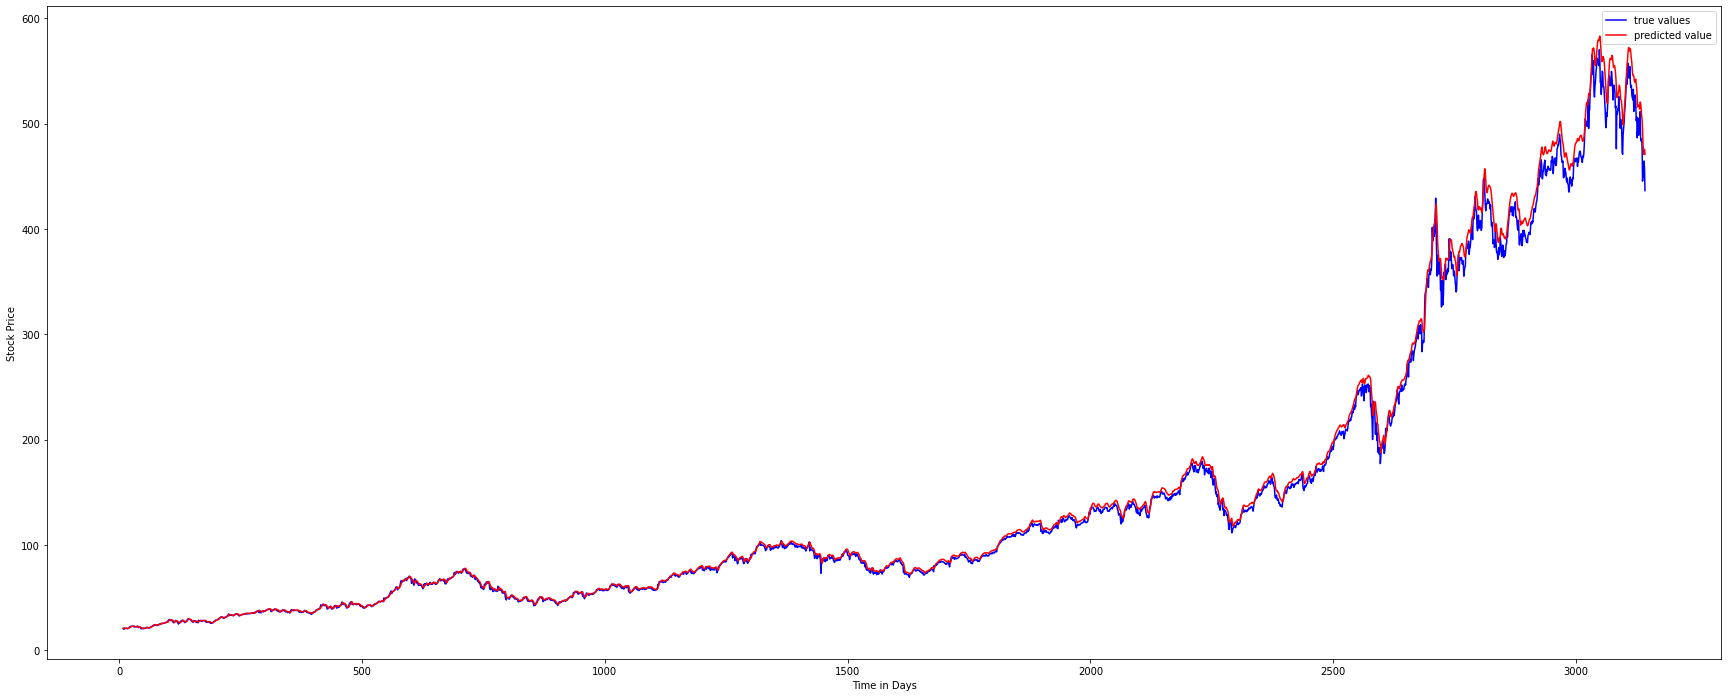

In [101]:
plt.figure(figsize=(30,12))#Set the figure size
plt.plot(time[7:],y_test_window_set,color='blue',label="true values")#Plot the true testing value in blue
plt.plot(time[7:],predicted_value,color='red',label='predicted value')#Plot the predicted value in red
plt.xlabel('Time in Days')#set label of x as Time
plt.ylabel('Stock Price')#set label of y as Value
plt.legend()#show the labels
plt.show()#show the plot

In [102]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
x_window_set,y_window_set=np.array(x),np.array(y)

# reshape from [samples, timesteps] into [samples, timesteps, features]

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_window_set.shape[1],6)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model

model.fit(x_window_set, y_window_set, epochs=200, batch_size=128)
# demonstrate prediction


Epoch 1/200
58/58 [==============================] - 3s 15ms/step - loss: 2.4026
Epoch 2/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0415
Epoch 3/200
58/58 [==============================] - 1s 16ms/step - loss: 0.0250
Epoch 4/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0240
Epoch 5/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0198
Epoch 6/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0213
Epoch 7/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0167
Epoch 8/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0235
Epoch 9/200
58/58 [==============================] - 1s 16ms/step - loss: 0.0164
Epoch 10/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0157
Epoch 11/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0152
Epoch 12/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0186
Epoch 13/200
58/58 [=====

In [103]:
x_real_test=df[train_time-7:]
x_a_real_test=np.array(x_real_test)
x_t_scaled=scaler.transform(x_a_real_test)
x_t=[]
y_t=[]
for i in range(7,x_t_scaled.shape[0]):
  x_t.append(x_t_scaled[i-7:i])
  y_t.append(x_t_scaled[i,0])
  
x_test_window_set,y_test_window_set=np.array(x_t),np.array(y_t)
predicted_value=model.predict(x_test_window_set)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


In [104]:
m = tf.keras.metrics.MeanAbsolutePercentageError()#initialize the MAPE class.
m.update_state(y_test_window_set,predicted_value)#calculate MAPE on Actual testing values and forecasted values
m.result().numpy()

7.67525

In [105]:
y_test_window_set.shape

(3135,)

In [109]:
time=np.arange(1,3136+7)

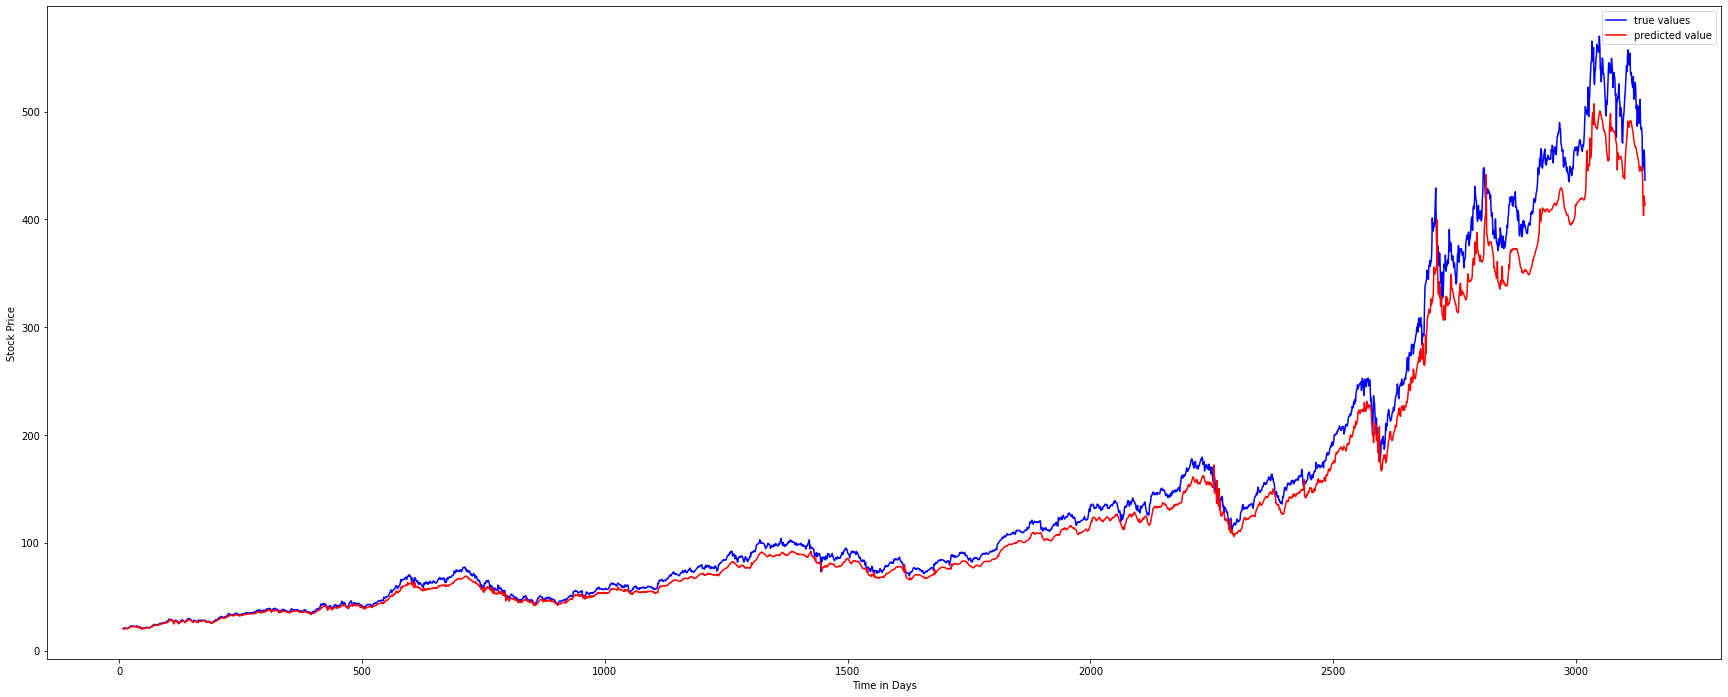

In [110]:
plt.figure(figsize=(30,12))#Set the figure size
plt.plot(time[7:],y_test_window_set,color='blue',label="true values")#Plot the true testing value in blue
plt.plot(time[7:],predicted_value,color='red',label='predicted value')#Plot the predicted value in red
plt.xlabel('Time in Days')#set label of x as Time
plt.ylabel('Stock Price')#set label of y as Value
plt.legend()#show the labels
plt.show()#show the plot2